# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Dense model 2*
*Epoch 350*

_MSE: 1.31_
15/15 - 0s - loss: 0.3815 - mae: 0.2470 - mse: 0.3815
Testing set Mean Abs Error:  0.25 ibova_0

In [65]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [66]:
dataset_path = 'final_ibova_oil_usd_ROC.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
# dataset
# 'index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4'


In [67]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [68]:
# Não tirei a variavel predita do treinamento
train_labels = train_dataset['ibova_0']
test_labels = test_dataset['ibova_0']

# Inspecionando os dados

In [69]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")

In [70]:
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")

# Construindo o modelo

In [71]:
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                

## Testando o modelo

In [72]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
# example_result

# Treinado o modelo

In [73]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 350

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
..................................................

In [74]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
345,2.924241,0.382336,2.924241,1.236649,0.741605,1.236649,345
346,2.926923,0.400752,2.926923,0.788529,0.233513,0.788529,346
347,2.933869,0.447927,2.933869,0.821216,0.309908,0.821216,347
348,2.919352,0.422241,2.919352,1.093137,0.577303,1.093137,348
349,2.913324,0.391581,2.913324,0.765041,0.205983,0.765041,349


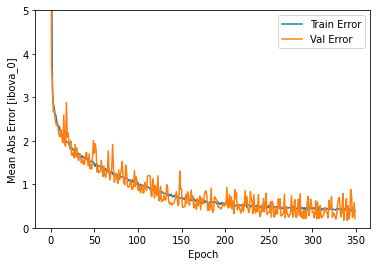

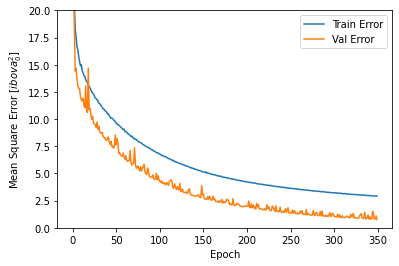

In [75]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
..................................................

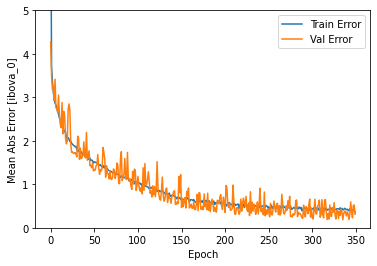

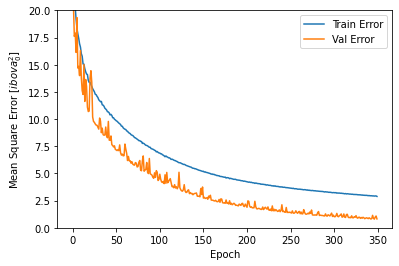

In [76]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [77]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ibova_0".format(mae))

15/15 - 0s - loss: 0.3815 - mae: 0.2470 - mse: 0.3815
Testing set Mean Abs Error:  0.25 ibova_0


# Realizando as previsões

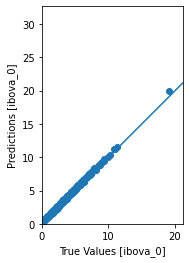

In [78]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [ibova_0]')
plt.ylabel('Predictions [ibova_0]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

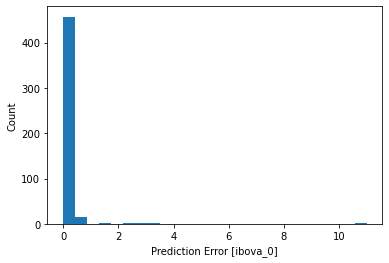

In [79]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ibova_0]")
_ = plt.ylabel("Count")

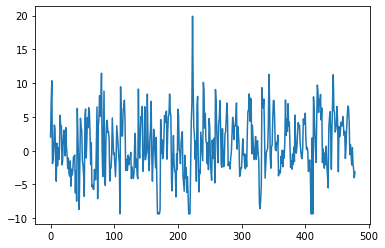

In [86]:
# Imprimindo previsoes
plt.plot(test_predictions)

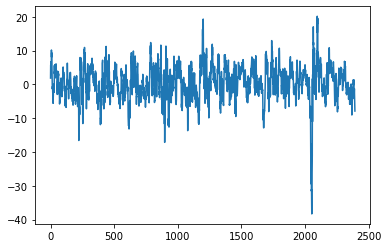

In [87]:
# Imprimindo valores reais
plt.plot(raw_dataset.ibova_0)

In [95]:
# Analisando Medias:

print(f'Massa de teste: {test_predictions.mean()}')
print(f'Massa inicial: {raw_dataset.ibova_0.mean()}')
print(f'Diferenças das médias: {raw_dataset.ibova_0.mean() - test_predictions.mean()}')

Massa de teste: 0.8270974159240723
Massa inicial: 0.34971185976716507
Diferenças das médias: -0.4773855561569072


In [80]:
raw_dataset.ibova_0

,index,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,oil_0,oil_1,oil_2,oil_3,oil_4,usd_0,usd_1,usd_2,usd_3,usd_4
0,0,1.852453,5.731218,5.678287,6.704554,4.870696,1.852453,5.731218,5.678287,6.704554,4.870696,1.852453,5.731218,5.678287,6.704554,4.870696
1,1,5.731218,5.678287,6.704554,4.870696,5.135128,5.731218,5.678287,6.704554,4.870696,5.135128,5.731218,5.678287,6.704554,4.870696,5.135128
2,2,5.678287,6.704554,4.870696,5.135128,5.976096,5.678287,6.704554,4.870696,5.135128,5.976096,5.678287,6.704554,4.870696,5.135128,5.976096
3,3,6.704554,4.870696,5.135128,5.976096,10.159998,6.704554,4.870696,5.135128,5.976096,10.159998,6.704554,4.870696,5.135128,5.976096,10.159998
4,4,4.870696,5.135128,5.976096,10.159998,8.056570,4.870696,5.135128,5.976096,10.159998,8.056570,4.870696,5.135128,5.976096,10.159998,8.056570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147
2389,2389,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182
2390,2390,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916
2391,2391,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764
